# EGSIS = Exploratory Graph-based Semi Supervised Image Segmentation

Unindo todas as partes: 

- criação de superpixels
- criação de rede complexa
- aplicação da dinâmica coletiva
- classificando as regiões não conhecidas
- obtendo segmentos da imagem

O objetivo simples aqui é destacar o fundo do objeto principal, no caso o gato. Realizarei apenas três anotações pra cada classe e rodarei o algoritmo

In [1]:
# ref: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut, cat, microaneurysms, rocket, horse, retina, coins
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte
import networkx as nx

from egsis import model
from egsis.complex_networks import complex_network_from_segments
from egsis.complex_networks import draw_complex_network
from egsis.superpixels import build_superpixels_from_image
from egsis.superpixels import superpixel_centroids
from egsis.superpixels import superpixels_max_radius
from egsis import features

# Gerar Superpixels

(-0.5, 450.5, 299.5, -0.5)

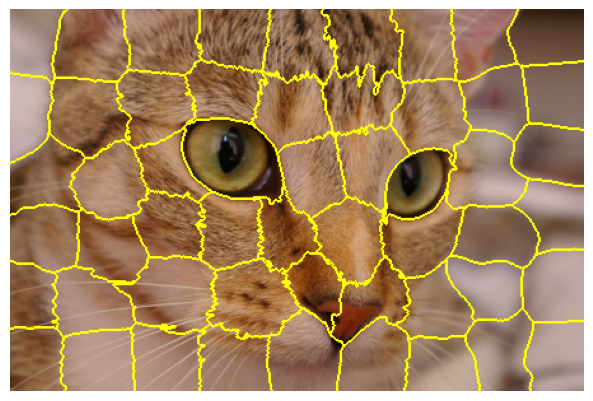

In [2]:
img = img_as_ubyte(cat())
superpixels = build_superpixels_from_image(img, n_segments=53, compactness=40, sigma=0.3)
ax = plt.imshow(mark_boundaries(img, superpixels))
plt.tight_layout()
plt.axis('off')

# Gerar Rede Complexa

(-29.6125, 450.5, 299.5, -0.5)

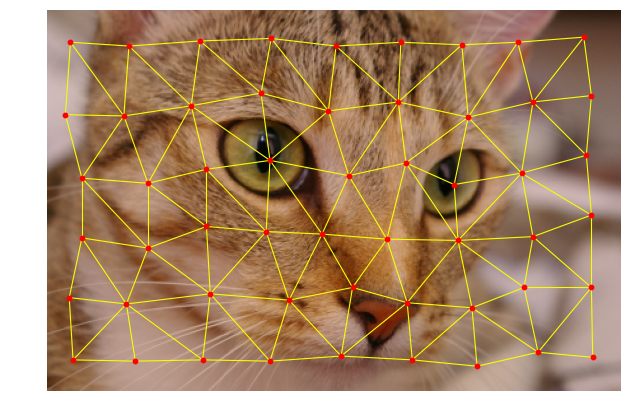

In [3]:
complex_network = complex_network_from_segments(superpixels)
centroids = superpixel_centroids(superpixels)
plt.imshow(img)
draw_complex_network(complex_network, superpixels)
plt.tight_layout()
plt.axis('off')

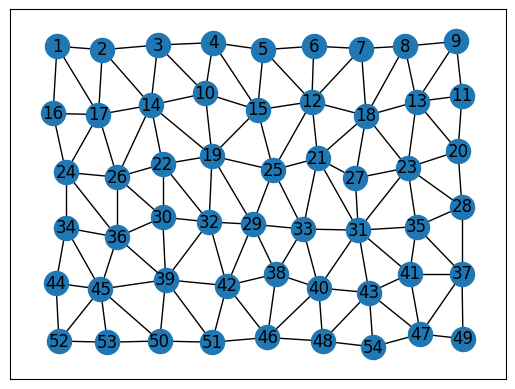

In [4]:
nx.draw_networkx(complex_network, pos=superpixel_centroids(superpixels))
plt.gca().invert_yaxis()
plt.show()

(-29.6125, 450.5, 299.5, -0.5)

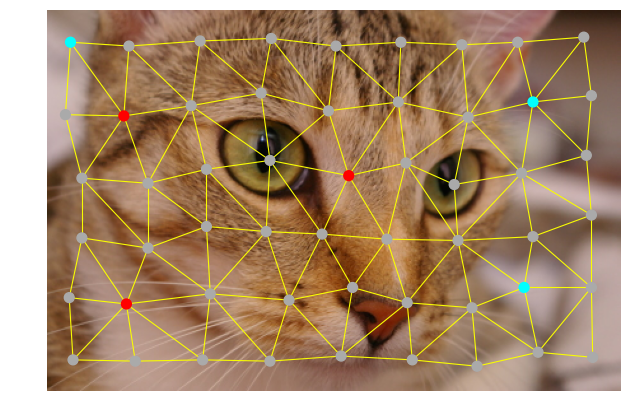

In [14]:
G = complex_network
labels_by_color = {
       1: "#ff0000", # gato
       2: "#00ffff", # fundo
}
superpixel_labels = {
    1:  2,
    13: 2,
    41: 2,
    25: 1,
    17: 1,
    45: 1
}
default = "#aaaaaa"
color_map = [labels_by_color.get(superpixel_labels.get(node), default)
             for node in G.nodes]
for node in G.nodes():
    G.nodes[node]["label"] = superpixel_labels.get(node, 0)
    
plt.imshow(img)
draw_complex_network(G, superpixels, node_size=50, node_color=color_map)
plt.tight_layout()
plt.axis('off')

In [6]:
X = img
y = np.zeros(shape=superpixels.shape, dtype=np.int64)
for superpixel, label in superpixel_labels.items():
    y[superpixels == superpixel] = label

m = model.EGSIS(
    superpixel_segments=53,
    superpixel_sigma=0.3,
    superpixel_compactness=40,
    feature_extraction="comatrix"
)

G = m.fit_predict(X, y)

2022-12-24 11:38:36.955 | DEBUG    | egsis.features:crop_image:80 - {'img': array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...

ValueError: The parameter `image` cannot be an empty array

In [ ]:
X

In [ ]:
img[:, :, 2]

In [7]:
centroids

{1: [18, 25],
 2: [64, 28],
 3: [120, 24],
 4: [176, 22],
 5: [227, 28],
 6: [278, 25],
 7: [326, 27],
 8: [370, 25],
 9: [422, 21],
 10: [168, 65],
 11: [428, 67],
 12: [276, 72],
 13: [382, 72],
 14: [113, 75],
 15: [221, 79],
 16: [14, 82],
 17: [60, 83],
 18: [331, 84],
 19: [175, 118],
 20: [424, 114],
 21: [282, 120],
 22: [125, 125],
 23: [373, 128],
 24: [27, 132],
 25: [237, 130],
 26: [79, 136],
 27: [320, 137],
 28: [428, 161],
 29: [216, 176],
 30: [125, 170],
 31: [323, 181],
 32: [172, 174],
 33: [267, 180],
 34: [27, 179],
 35: [382, 178],
 36: [79, 187],
 37: [428, 218],
 38: [240, 218],
 39: [128, 223],
 40: [283, 230],
 41: [375, 218],
 42: [190, 228],
 43: [334, 234],
 44: [17, 226],
 45: [62, 231],
 46: [231, 272],
 47: [386, 269],
 48: [287, 275],
 49: [429, 273],
 50: [122, 275],
 51: [175, 276],
 52: [20, 275],
 53: [69, 276],
 54: [338, 280]}

In [10]:
features.crop_image(img, max_radius=40, centroid=[18, 25])

2022-12-24 11:41:11.035 | DEBUG    | egsis.features:crop_image:80 - {'img': array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...

array([], shape=(0, 0, 3), dtype=uint8)